## Import Neccessary Libraries

In [1]:
import pymysql  # connector for python and mysql
import warnings 
import pandas as pd # data manipulation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

## Connect Jupyter Notebook With Jamb Project Database

In [2]:
def connect_mysql():
    """
    connecting the jamb project database with jupyter notebook
    """
    con_db = pymysql.connect(
        host = "localhost",
        user = "root",
        password = "***ileh***.",  ## password encoded please the csv file to load the data
        database = "jamb_project"
    )
    cursor = con_db.cursor()  
    return con_db, cursor

con, cursor = connect_mysql()  # defining the connection and cursor
print("Jamb Project Database Connected!")





Jamb Project Database Connected!


## Show Tables in Database

In [3]:
def show_tables(connection,pointer,database_name):
    use_db = f"use {database_name}"  # selecting the database 
    pointer.execute(use_db)
    show_tables = "show tables"
    pointer.execute(show_tables)
    result = pointer.fetchall()
    for i in result:
        print(i)

show_tables(con,cursor,"jamb_project")
    

('jamb_score',)


## View A Table in The Database And Read As A Python Dataframe

In [4]:
def query_table(connection,table):
    """
    Querying a Table from the Database
    """
    query_statement = f"select * from {table}"
    
    import pandas as pd 
    data = pd.read_sql(query_statement, connection) # Reading the table as pandas dataframe and defining it
    return data

df = query_table(con,"jamb_score") 
    

C:\Users\user\AppData\Local\Temp\ipykernel_17796\3891057560.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query_statement, connection) # Reading the table as pandas dataframe and defining it


In [5]:
def examine_data(data):
    data = data.copy()
    print(f"The data has {data.shape} rows and columsn respectively")
    print()
    print("The following are the columns in the dataframe")
    columns = data.columns
    print(columns)
    print()
    data.columns = data.columns.str.lower()  # converting column case to lower case
    data.columns = data.columns.str.strip()  # stripping extra spaces from the column names
    data.columns = data.columns.str.replace(" ", "_") # repacing the spaces between text with "_"
    structure = data.info()
    print(structure)
    return data

df = examine_data(df)
    

The data has (4999, 17) rows and columsn respectively

The following are the columns in the dataframe
Index(['Jamb_Score', 'Age', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'Assignments_Completed',
       'School_Type', 'School_Location', 'Extra_Tutorials',
       'Access_To_Learning_Materials', 'Parent_Involvement', 'IT_Knowledge',
       'Student_ID', 'Gender', 'Socioeconomic_Status',
       'Parent_Education_Level'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    4999 non-null   int64  
 1   age                           4999 non-null   int64  
 2   study_hours_per_week          4999 non-null   int64  
 3   attendance_rate               4999 non-null   int64  
 4   teacher_quality               4999 non-

In [6]:
data_overview = df.head(10) 
print(data_overview) ## printing the first 10  rows of the dataset

   jamb_score  age  study_hours_per_week  attendance_rate  teacher_quality  \
0         207   15                    14               88                4   
1         182   20                    29               87                2   
2         210   22                    29               99                2   
3         199   22                    12               98                3   
4         202   15                    25               85                2   
5         251   16                    35               85                4   
6         129   19                    27               75                3   
7         220   19                    23               85                3   
8         157   20                    15               79                3   
9         188   22                    32               90                2   

   distance_to_school  assignments_completed school_type school_location  \
0                 2.7                      1      Public         

## Data Cleaning and Wrangling 

In [7]:
df = df.rename(columns={"jamb_score":"score"})  ## renaming jamb_score to score 

In [8]:
duplicated_row = df.duplicated().sum()  ## identifying duplicated rows in the dataset
print(duplicated_row)

0


In [9]:
missing_value = df.isna().sum() ## Identifying the missing values in the dataset
print(missing_value)

score                           0
age                             0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
assignments_completed           0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
student_id                      0
gender                          0
socioeconomic_status            0
parent_education_level          0
dtype: int64


In [10]:
num_cols = df.select_dtypes(include=["int","float"]).columns  ## identyfying numeric columns in the dataset
cat_cols = df.select_dtypes("object").columns  ## Identifying categorical columns in the dataset
print("Columns Splitted Successfully")


Columns Splitted Successfully


In [11]:
summary_stat = df[num_cols].describe().T  ## descriptive statistic of the numeric columns in the dataset
print(summary_stat)

                        count        mean        std    min    25%    50%  \
score                  4999.0  174.071014  47.620565  100.0  135.0  170.0   
age                    4999.0   18.446089   2.301644   15.0   16.0   18.0   
study_hours_per_week   4999.0   19.520704   9.635469    0.0   13.0   19.0   
attendance_rate        4999.0   84.236447   9.486227   50.0   78.0   84.0   
teacher_quality        4999.0    2.521104   0.985441    1.0    2.0    2.0   
distance_to_school     4999.0   10.004981   4.820584    0.0    6.6   10.0   
assignments_completed  4999.0    1.804561   0.992172    1.0    1.0    1.0   

                         75%    max  
score                  209.0  367.0  
age                     20.0   22.0  
study_hours_per_week    26.0   40.0  
attendance_rate         91.0  100.0  
teacher_quality          3.0    5.0  
distance_to_school      13.4   20.0  
assignments_completed    2.0    5.0  


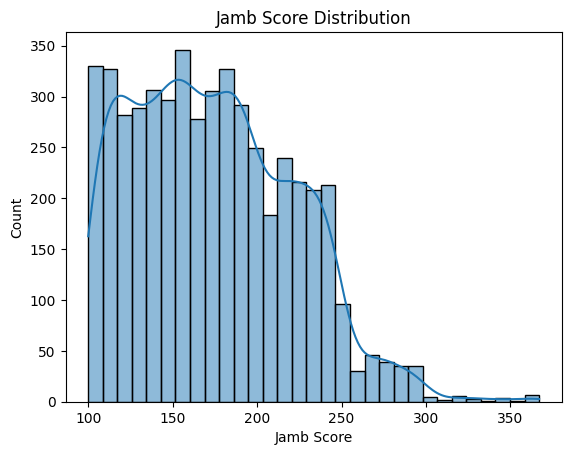

<Figure size 400x400 with 0 Axes>

In [12]:
jamb_score_plot = sns.histplot(df,x="score", kde = True)
plt.title("Jamb Score Distribution")
plt.xlabel("Jamb Score")
plt.figure(figsize=(4,4))
plt.show()

## Score Skewness

Since the mean (174.07) is slightly higher than the median (170.0), and the max (367.0) is far above the mean, the **score** is likely **positively skewed**. This means that while most students score near the middle range, there are a few high outliers pulling the distribution to the right.


## Correlation Analysis

In [13]:
correlation = df[num_cols].corr()["score"] ## CORRELATION ANALYSIS
print(correlation)

score                    1.000000
age                     -0.028386
study_hours_per_week     0.420051
attendance_rate          0.281019
teacher_quality          0.299464
distance_to_school      -0.094183
assignments_completed    0.278069
Name: score, dtype: float64


### Correlation Insights

- **Study hours per week** has the strongest correlation with the score, indicating that study time is a significant predictor of performance.
- **Teacher quality**, **attendance rate**, and **assignments completed** also have positive correlations, but their impact is weaker.
- **Distance to school** and **age** show negative but weak correlations, indicating these factors do not have a strong effect on the score.


## Data preprocessing

In [14]:
x = df[num_cols].drop("score",axis=1)  ## independent variables
y = df["score"]  ## dependent variable

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = .2, random_state = 45)  ## splitting data inot training and testing sets 
print(x_train.shape, y_train.shape)

(3999, 6) (3999,)


## Machine Learning 

### Linear Regression

In [16]:
lr = LinearRegression()  ## definining the linear regression model
lr_model = lr.fit(x_train,y_train)  ## training the linear regression with the trained set
lr_predict = lr_model.predict(x_test)  ## predicting the testing test using the trained model
lr_r2 = r2_score(y_test,lr_predict)
lr_coef = lr_model.coef_
lr_intercept = lr_model.intercept_
lr_mae = mean_absolute_error(y_test, lr_predict).astype(int)
lr_mape = (mean_absolute_percentage_error(y_test, lr_predict)*100).astype(int)

## Decision Tree Regressor Model

In [17]:
tree = DecisionTreeRegressor()
tree_model = tree.fit(x_train, y_train)
tree_predict = tree_model.predict(x_test)
tree_r2 = r2_score(y_test,tree_predict)
tree_mae = mean_absolute_error(y_test, tree_predict).astype(int)
tree_mape = (mean_absolute_percentage_error(y_test, tree_predict)*100).astype(int)


## Random Forest Regressor Model

In [18]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)
rf_r2 = r2_score(y_test, rf_predict)
rf_mae = mean_absolute_error(y_test, rf_predict).astype(int)
rf_mape = (mean_absolute_percentage_error(y_test, rf_predict)*100).astype(int)
print(f"The MAE and MAPE are {rf_mae, rf_mape} respectively")

The MAE and MAPE are (34, 21) respectively


## Xgboost Regressor Model

In [19]:
xgb = XGBRegressor()
xgb_model = xgb.fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
xgb_r2 = r2_score(y_test, xgb_predict)
xgb_mae = mean_absolute_error(y_test, xgb_predict).astype(int)
xgb_mape = (mean_absolute_percentage_error(y_test, xgb_predict)*100).astype(int)
print(f"The  MAE and MAPE are {xgb_mae, xgb_mape} respectively")

The  MAE and MAPE are (36, 22) respectively


## Model Evaluation

In [20]:
evaluation = {
    "Model": ["Linear Regression", "Decision Tree Regressor","Random Forest Regressor", "Xgboost Regressor"],
    "R Squared": [lr_r2,tree_r2,rf_r2,xgb_r2],
    "MAE": [lr_mae,tree_mae,rf_mae,xgb_mae],
    "MAPE": [lr_mape, tree_mape, rf_mape, xgb_mape]
}
evaluation_table = pd.DataFrame(evaluation)
print(evaluation_table)

                     Model  R Squared  MAE  MAPE
0        Linear Regression   0.262049   33    20
1  Decision Tree Regressor  -0.384281   45    27
2  Random Forest Regressor   0.220451   34    21
3        Xgboost Regressor   0.119116   36    22


## Regression Model Performance Comparison

In this notebook, we evaluate the performance of four regression models:
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**
- **XGBoost Regressor**

We will assess these models using the following evaluation metrics:
- **R² (R Squared)**: A measure of how well the regression model explains the variance in the data. A higher value is better.
- **MAE (Mean Absolute Error)**: The average absolute difference between the predicted and actual values. A lower value is better.
- **MAPE (Mean Absolute Percentage Error)**: The average percentage difference between the predicted and actual values. A lower value is better.

### 1. Linear Regression
- **R²**: 0.262
- **MAE**: 33
- **MAPE**: 20%

**Interpretation**: This model explains 26.2% of the variance in the data, with an average error of 33 units and a 20% percentage error. It performs reasonably well.

### 2. Decision Tree Regressor
- **R²**: -0.383
- **MAE**: 45
- **MAPE**: 27%

**Interpretation**: A negative R² means that the model is performing worse than a simple mean-based prediction. It has a higher error (45 units) and a higher percentage error (27%), making it the least effective model.

### 3. Random Forest Regressor
- **R²**: 0.217
- **MAE**: 34
- **MAPE**: 21%

**Interpretation**: This model explains 21.7% of the variance in the data. While it performs slightly worse than linear regression, it still achieves a reasonable level of accuracy with an average error of 34 units.

### 4. XGBoost Regressor
- **R²**: 0.119
- **MAE**: 36
- **MAPE**: 22%

**Interpretation**: This model explains 11.9% of the variance and has an average error of 36 units, making it slightly worse than random forest but better than the decision tree.


### Conclusion
Based on the results, **Linear Regression** is the best-performing model, explaining 26.2% of the variance and achieving the lowest errors. **Random Forest** is the second-best model, followed by **XGBoost**, while **Decision Tree** performs the worst.

In future iterations, we can further improve model performance by tuning hyperparameters, performing feature selection, or using more advanced ensemble methods.


## Feature Importance

In [21]:
lr_importance = {
    "Variables": x.columns,
    "Importance": lr_coef
}
lr_importance_table = pd.DataFrame(lr_importance)
print(lr_importance_table)

               Variables  Importance
0                    age   -0.617494
1   study_hours_per_week    1.747481
2        attendance_rate    1.041210
3        teacher_quality   11.636238
4     distance_to_school   -0.713211
5  assignments_completed    1.149821


## Insights:
- **Teacher quality** has the highest positive importance, suggesting it is the most influential factor in determining the score.
- **Study hours per week** and **assignments completed** also have positive importance, indicating that they contribute positively to the model.
- **Age** and **distance to school** have negative importance, indicating a slight negative relationship with the target variable.